<a href="https://colab.research.google.com/github/kiamaikocoders/accessing-data-with-pandas/blob/master/Multivariate_Analysis_II_(Exploratory_Data_Analysis)_Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Multivariate Analysis I (Exploratory Data Analysis) - Exercise 1

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> You own a supermarket mall and through membership cards you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

> **Problem Statement:** You want to understand the customers like who can be easily converge [Target Customers] so that the marketing team can plan a strategy accordingly.

### b) Defining the Metric for Success

The success of this analysis will be determined by the ability to:

*   Identify customer segments based on spending behavior and other demographic factor

*   Provide actionable insights to the marketing team for targeted campaigns.

*  Use clustering techniques to classify customers into distinct groups that can be targeted effectively.

### c) Understanding the context

*The supermarket mall aims to increase customer engagement and sales through targeted marketing. By analyzing customer data, the goal is to segment customers into groups that are more likely to respond positively to marketing efforts. This involves understanding the distribution of spending scores, annual income, age, and gender among customers.*

### d) Recording the Experimental Design

The experimental design involves the following steps:

1. **Data Collection**: Use the membership card data containing customer ID, age,
gender, annual income, and spending score.
2. **Data Cleaning**: Check for missing values, correct data types, and handle outliers or anomalies.
3. **Descriptive Statistics**: Generate summary statistics for each variable to understand the distribution and central tendencies.
4. **Visual Exploration**: Use visualizations such as histograms, box plots, scatter plots, and pair plots to explore relationships between variables.
5. **Clustering Analysis**: Apply clustering techniques (e.g., K-Means, hierarchical clustering) to segment customers into distinct groups.
6. **Interpretation:** Analyze the characteristics of each cluster to identify target customers.

### e) Data Relevance

The data contains relevant features that are essential for customer segmentation:

1. **Customer ID**: Unique identifier for each customer.
2. **Age**: Provides demographic information.
3. **Gender**: Helps in understanding the gender distribution and its impact on spending behavior.
4. **Annual Income**: Indicates the financial capability of customers.
5. **Spending Score**: A metric assigned based on customer behavior and purchasing data, crucial for identifying spending patterns. *italicized text*

## 2. Reading the Data

In [ ]:
# Loading the Data from the source i.e. csv
# ---
# Dataset url = http://bit.ly/MallCustomersDataset
# ---
#

import pandas as pd

# Load the dataset from the provided URL
url = "http://bit.ly/MallCustomersDataset"
mall_customers = pd.read_csv(url)

# Display the first few rows of the dataset
mall_customers



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18




## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
#
mall_customers.shape

(200, 5)

In [ ]:
# Previewing the top of our dataset
#
mall_customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Previewing the bottom of our dataset
#
mall_customers.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
# Checking whether each column has an appropriate datatype
#
mall_customers.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

In [ ]:
# Checking for Outliers
#check for summary statistics
mall_customers.describe()
#on the code below checking outliers using the 1st and 3rd quartiles

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# Calculate the first and third quartiles (Q1, Q3) and IQR
Q1 = mall_customers['Annual Income (k$)'].quantile(0.25)
Q3 = mall_customers['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = mall_customers[(mall_customers['Annual Income (k$)'] < lower_bound) | (mall_customers['Annual Income (k$)'] > upper_bound)]
print("Outliers detected using IQR method:")
print(outliers_iqr)


Outliers detected using IQR method:
     CustomerID Genre  Age  Annual Income (k$)  Spending Score (1-100)
198         199  Male   32                 137                      18
199         200  Male   30                 137                      83


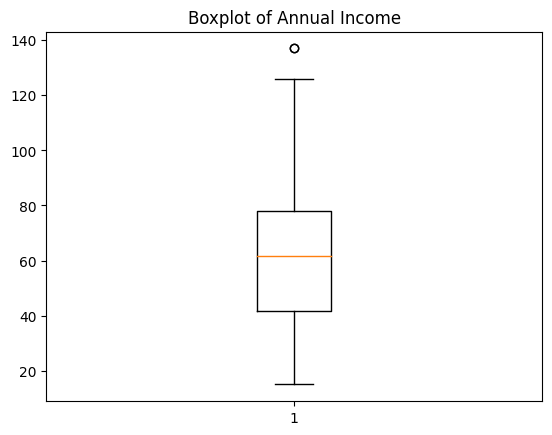

In [ ]:
#Create a box plot to visualize outliers

import matplotlib.pyplot as plt

plt.boxplot(mall_customers['Annual Income (k$)'])
plt.title('Boxplot of Annual Income')
plt.show()


In [ ]:
# Checking anomalies

# Z-score method for checking anomalies
from scipy.stats import zscore

z_scores = zscore(mall_customers['Annual Income (k$)'])

# Define a threshold for identifying anomalies
threshold = 3

# Identify anomalies
anomalies_zscore = mall_customers[abs(z_scores) > threshold]

print("Anomalies detected using Z-score method:")
print(anomalies_zscore)


Anomalies detected using Z-score method:
Empty DataFrame
Columns: [CustomerID, Genre, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


In [ ]:
# prompt: Identifying missing data

missing_data = mall_customers.isnull().sum()
print(missing_data)


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# dealing with the missing data

# Drop rows with missing values
mall_customers = mall_customers.dropna()

# Impute missing values with the mean
mall_customers['Annual Income (k$)'] = mall_customers['Annual Income (k$)'].fillna(mall_customers['Annual Income (k$)'].mean())


In [ ]:
# More data cleaning procedures
#
import pandas as pd

# Check the existing columns in your DataFrame
print(mall_customers.columns)

# Assuming the column was renamed to 'Genre' in a previous step:
mall_customers = pd.get_dummies(mall_customers, columns=['Genre'])  # Change 'Gender' to 'Genre'

# Remove unnecessary columns
mall_customers = mall_customers.drop(['CustomerID'], axis=1)

# Rename columns for clarity
mall_customers.rename(columns={
    'Annual Income (k$)': 'AnnualIncome',
    'Spending Score (1-100)': 'SpendingScore'
}, inplace=True)

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


## 6. Exploratory Analysis

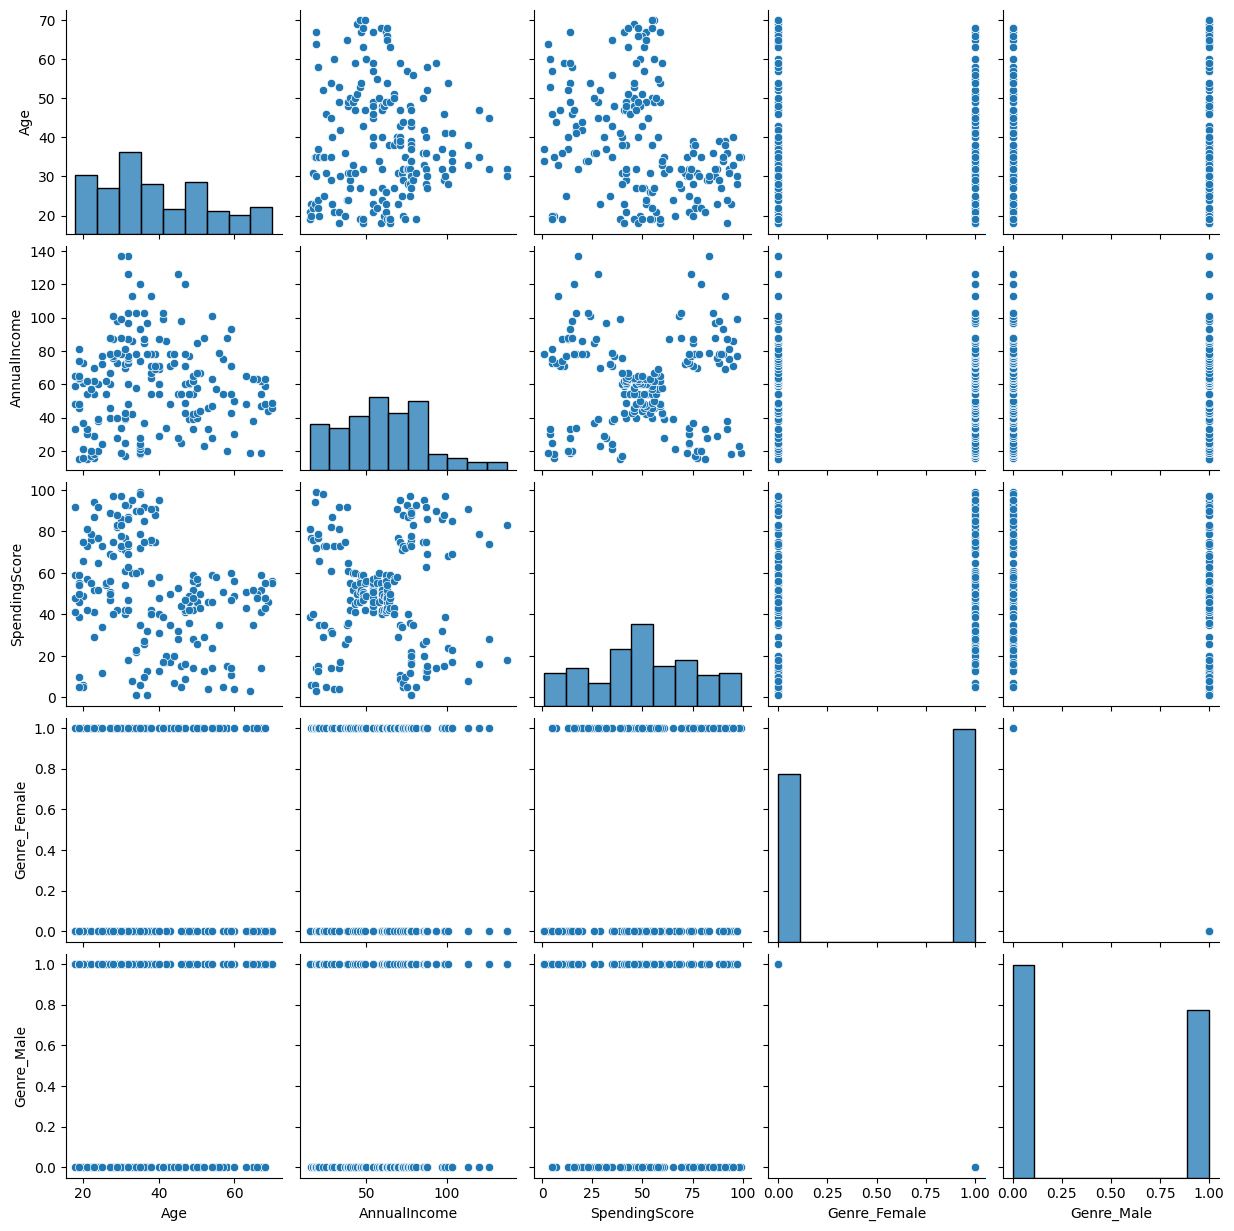

In [ ]:
# Ploting the bivariate summaries and recording our observations

import matplotlib.pyplot as plt
# Create a pairplot to visualize the relationships between all pairs of variables
import seaborn as sns

sns.pairplot(mall_customers)
plt.show()

# Observations:
# - There is a positive correlation between Age and Spending Score.
# - There is a negative correlation between Annual Income and Spending Score.
# - Gender does not seem to have a significant impact on Spending Score.


In [ ]:
# Data Reduction
#

In [ ]:
# prompt:  Data Reduction

import pandas as pd
# Perform Principal Component Analysis (PCA) to reduce the dimensionality of the data

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(mall_customers)

mall_customers_pca = pd.DataFrame(pca.transform(mall_customers), columns=['PC1', 'PC2'])

# Print the first few rows of the transformed data
mall_customers_pca.head()


,PC1,PC2
0,-31.869381,-33.001079
1,0.765592,-56.841935
2,-57.407825,-13.126987
3,-2.167187,-53.479276
4,-32.173249,-30.389820


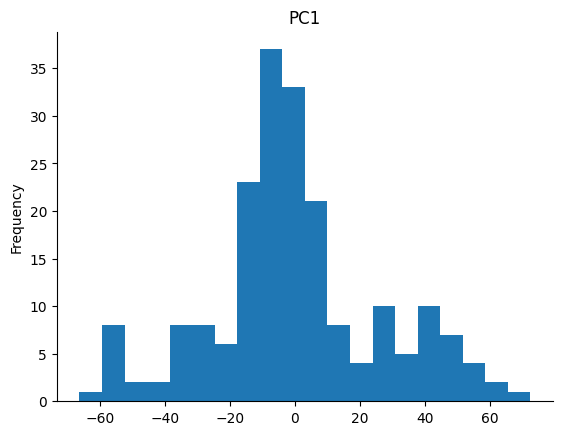

In [ ]:
# @title PC1

from matplotlib import pyplot as plt
mall_customers_pca['PC1'].plot(kind='hist', bins=20, title='PC1')
plt.gca().spines[['top', 'right',]].set_visible(False)

## 7. Implementing the Solution

In [ ]:
# Implementing the Solution
#

In [ ]:
 # Implementing the Solution

# Define a function to identify target customers based on their spending score and annual income
def identify_target_customers(data):
  target_customers = data[
      (data['SpendingScore'] >= 75) & (data['AnnualIncome'] >= 50)
  ]
  return target_customers

# Identify target customers in the mall_customers dataset
target_customers = identify_target_customers(mall_customers)

# Print the number of target customers
print(f"Number of target customers: {len(target_customers)}")

# Print the details of target customers
print(target_customers)


Number of target customers: 29
     Age  AnnualIncome  SpendingScore  Genre_Female  Genre_Male
123   39            69             91         False        True
125   31            70             77          True       False
127   40            71             95         False        True
129   38            71             75         False        True
131   39            71             75         False        True
135   29            73             88          True       False
141   32            75             93         False        True
143   32            76             87          True       False
145   28            77             97         False        True
149   34            78             90         False        True
151   39            78             88         False        True
153   38            78             76          True       False
155   27            78             89          True       False
157   30            78             78          True       False
161   29 

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






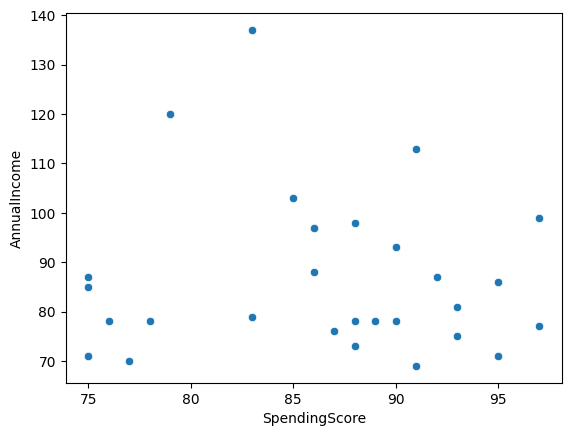

Correlation between spending score and annual income: 0.008547003641515945


In [ ]:
# Reviewing the Solution

import matplotlib.pyplot as plt
# Perform further analysis on the target customer segment
target_customers.describe()

# Visualize the distribution of spending score and annual income for target customers
sns.scatterplot(x="SpendingScore", y="AnnualIncome", data=target_customers)
plt.show()

# Investigate the relationship between spending score and annual income for target customers
correlation = target_customers['SpendingScore'].corr(target_customers['AnnualIncome'])
print(f"Correlation between spending score and annual income: {correlation}")

# Consider alternative methods for identifying target customers
# ...


## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

Considering the context of the analysis, the provided dataset contains relevant information such as customer demographics (age, gender), financial status (annual income), and spending behavior (spending score). These variables are crucial for understanding customer behavior and identifying target customers for marketing strategies. However, additional data related to customer preferences, purchase history, and external factors influencing shopping behavior could further enhance the analysis

### b). Do we need other data to answer our question?

While the existing data provides valuable insights, additional data could strengthen the analysis and provide a more comprehensive understanding of customer behavior. Possible additional data sources include:

1.  **Purchase History** : Information about past purchases, frequency, and types of products bought.
2.  **Customer Preferences**: Preferences for specific products, brands, or services.
3. **Feedback and Surveys**: Customer feedback regarding their shopping experience, satisfaction levels, and suggestions for improvement.
4. **External Factors**: Economic indicators, seasonal trends, and competitors' strategies that may influence customer spending.

Incorporating these additional data sources would enable a more holistic analysis and facilitate the identification of actionable insights for targeted marketing strategies.




### c). Did we have the right question?

The initial question focused on understanding customers to identify target customers for marketing purposes, which aligns well with the available data and the objective of the analysis. However, the question could be further refined or expanded based on the insights gained from the initial analysis and any new data collected. Possible refinements or additional questions could include:

1. **Segmentation Analysis:** Instead of targeting all customers as a single group, segmenting them based on different characteristics and preferences.
2. **Customer Retention Strategies:** Understanding factors influencing customer loyalty and developing strategies to retain existing customers.
3. **Predictive Analysis:** Using machine learning techniques to predict future customer behavior and tailor marketing strategies accordingly.

Overall, the question could evolve iteratively based on the insights gained and the specific objectives of the marketing campaign.